# DivNoising - Prediction
This notebook contains an example on how to use a previously trained DivNoising VAE to denoise images.
If you haven't done so please first run 'Convallaria-CreateNoiseModel.ipynb' and 'Convallaria-Training.ipynb', which will download the data, create a noise model and train the VAE.  

In [1]:
# We import all our dependencies.
import urllib
import os
import zipfile
import numpy as np
from tqdm import tqdm
from tifffile import imread
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('../../')

from divnoising import dataLoader
from divnoising import utils
from divnoising import training
from nets import model
import torch
from divnoising.utils import loadImages

from tqdm import tqdm

# Load data to predict on

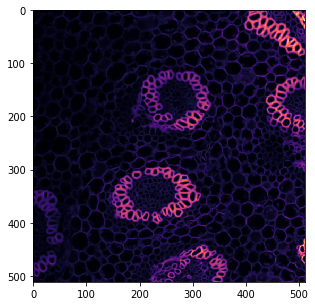

In [2]:
path="data/Convallaria_diaphragm/"

# The test data is just one quater of the full image ([:,:512,:512])
observation= imread(path+'20190520_tl_25um_50msec_05pc_488_130EM_Conv.tif').astype(np.float32)[:,:512,:512]
signal=np.mean(observation[:,...],axis=0)[np.newaxis,...]
img_width, img_height = signal.shape[1], signal.shape[2]

plt.figure(figsize=(15, 5))
plt.imshow(signal[0],cmap='magma')

# Load our model

In [3]:
vae = torch.load('convallaria-last_vae.net')

# Here we predict some qulitative diverse solutions

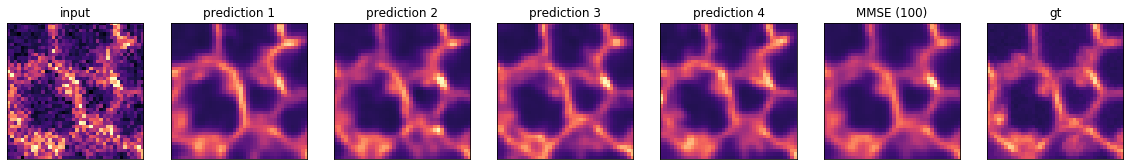

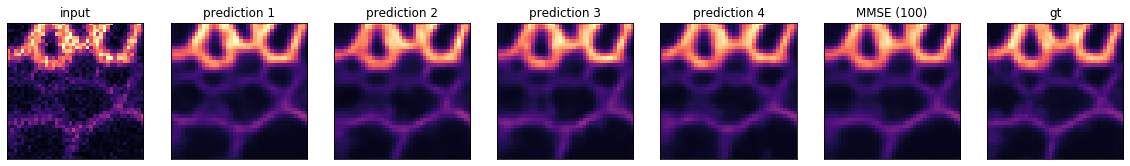

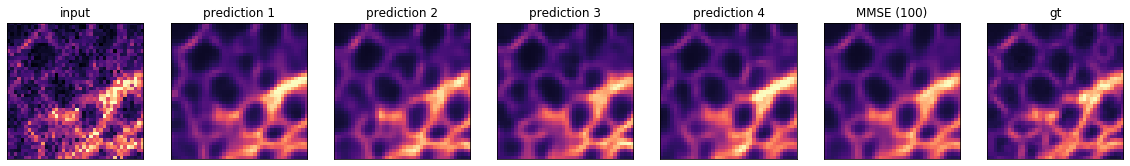

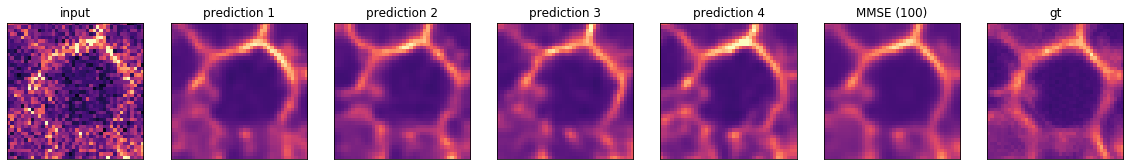

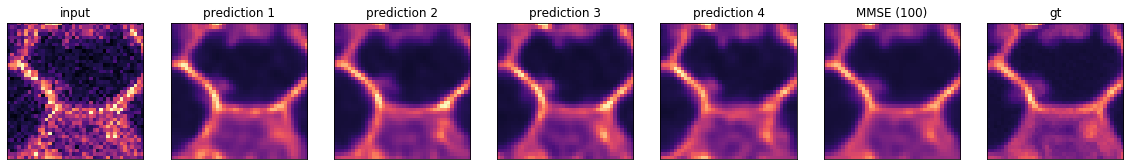

In [4]:
for j in range(5):  
    
    # we select a random crop
    size=40
    minx=np.random.randint(0,signal.shape[1]-size)
    miny=np.random.randint(0,signal.shape[2]-size)
    gt=signal[0][minx:minx+size,miny:miny+size]
    img=observation[0][minx:minx+size,miny:miny+size]
    imgT=torch.Tensor(img)
    
    # determine the min and max value for display
    vmin=np.percentile(img,0)
    vmax=np.percentile(img,99)
    
    # generate samples and MMSE estimate
    imgMMSE, samps=utils.predictMMSE(vae, imgT, 100, returnSamples=True, tq=False)
    
    plt.figure(figsize=(20, 6.75))
    
    # We display the noisy input image
    ax=plt.subplot(1,7,1)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(img,vmin=vmin, vmax=vmax,cmap='magma')
    plt.title('input')
    
    # We display the ground truth
    ax=plt.subplot(1,7,7)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(gt,vmin=vmin, vmax=vmax,cmap='magma')
    plt.title('gt')

    # We display the average of 100 predicted samples
    ax=plt.subplot(1,7,6)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.imshow(imgMMSE,vmin=vmin, vmax=vmax,cmap='magma')
    plt.title('MMSE (100)')
    
    #We also display the first 4 samples
    for i in range(4):     
        ax=plt.subplot(1,7,i+2)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.imshow(samps[i],vmin=vmin, vmax=vmax,cmap='magma')
        plt.title('prediction '+str(i+1))

    plt.show()

# Compute PSNR and the dataset

In [5]:
import time
PSNRs=[]
for i in range(100):
    img=observation[i]
    imgMMSE=utils.predictMMSE(vae, img, 1000)
    psnr=utils.PSNR(signal[0],imgMMSE)
    PSNRs.append(psnr)
    print("psnr:"+str(psnr)+ "\t mean psnr:"+ str(np.mean(PSNRs)) )
    time.sleep(0.5)
    
print('mean',np.mean(PSNRs))

100%|██████████| 1000/1000 [00:03<00:00, 284.64it/s]


psnr:36.986711145565785	 mean psnr:36.986711145565785


100%|██████████| 1000/1000 [00:04<00:00, 221.09it/s]


psnr:36.896636566484545	 mean psnr:36.94167385602516


100%|██████████| 1000/1000 [00:04<00:00, 228.70it/s]


psnr:36.91747214726581	 mean psnr:36.93360661977204


100%|██████████| 1000/1000 [00:04<00:00, 237.49it/s]


psnr:36.9316255078023	 mean psnr:36.93311134177961


100%|██████████| 1000/1000 [00:04<00:00, 214.12it/s]


psnr:36.95526096051107	 mean psnr:36.937541265525894


100%|██████████| 1000/1000 [00:04<00:00, 233.46it/s]


psnr:36.92820138162316	 mean psnr:36.93598461820877


100%|██████████| 1000/1000 [00:04<00:00, 222.64it/s]


psnr:36.930346676452594	 mean psnr:36.93517919795789


100%|██████████| 1000/1000 [00:04<00:00, 230.00it/s]


psnr:36.929143953279876	 mean psnr:36.93442479237314


100%|██████████| 1000/1000 [00:04<00:00, 225.54it/s]


psnr:36.979350901075094	 mean psnr:36.939416582228915


100%|██████████| 1000/1000 [00:04<00:00, 222.51it/s]


psnr:36.99240283345813	 mean psnr:36.944715207351834


100%|██████████| 1000/1000 [00:04<00:00, 224.92it/s]


psnr:37.0303604837797	 mean psnr:36.95250114157255


100%|██████████| 1000/1000 [00:04<00:00, 222.87it/s]


psnr:36.92890392421906	 mean psnr:36.95053470679309


100%|██████████| 1000/1000 [00:04<00:00, 224.70it/s]


psnr:36.890413492509964	 mean psnr:36.94590999800209


100%|██████████| 1000/1000 [00:04<00:00, 228.80it/s]


psnr:36.94968480013231	 mean psnr:36.94617962672567


100%|██████████| 1000/1000 [00:04<00:00, 229.52it/s]


psnr:36.9636122815966	 mean psnr:36.94734180371707


100%|██████████| 1000/1000 [00:04<00:00, 233.59it/s]


psnr:36.878993629108365	 mean psnr:36.943070042804024


100%|██████████| 1000/1000 [00:04<00:00, 220.79it/s]


psnr:36.92815234308747	 mean psnr:36.942192531055994


100%|██████████| 1000/1000 [00:04<00:00, 230.27it/s]


psnr:36.946698008153874	 mean psnr:36.94244283533921


100%|██████████| 1000/1000 [00:04<00:00, 222.87it/s]


psnr:36.90358869800762	 mean psnr:36.94039788074281


100%|██████████| 1000/1000 [00:04<00:00, 227.99it/s]


psnr:36.94681143258613	 mean psnr:36.94071855833498


100%|██████████| 1000/1000 [00:04<00:00, 230.29it/s]


psnr:36.94309652631542	 mean psnr:36.94083179490548


100%|██████████| 1000/1000 [00:04<00:00, 228.38it/s]


psnr:36.90223583550968	 mean psnr:36.93907743311476


100%|██████████| 1000/1000 [00:04<00:00, 224.47it/s]


psnr:36.869439274962666	 mean psnr:36.936049687108145


100%|██████████| 1000/1000 [00:04<00:00, 232.16it/s]


psnr:36.95466246625849	 mean psnr:36.93682521957273


100%|██████████| 1000/1000 [00:04<00:00, 221.07it/s]


psnr:36.957835386306655	 mean psnr:36.937665626242094


100%|██████████| 1000/1000 [00:04<00:00, 225.18it/s]


psnr:36.96304690765117	 mean psnr:36.93864182937321


100%|██████████| 1000/1000 [00:04<00:00, 226.41it/s]


psnr:36.96192703278595	 mean psnr:36.93950424431442


100%|██████████| 1000/1000 [00:04<00:00, 218.02it/s]


psnr:36.88311938989023	 mean psnr:36.93749049951356


100%|██████████| 1000/1000 [00:04<00:00, 226.61it/s]


psnr:36.87859458552256	 mean psnr:36.93545960592766


100%|██████████| 1000/1000 [00:04<00:00, 231.98it/s]


psnr:36.95072222746865	 mean psnr:36.93596835997903


100%|██████████| 1000/1000 [00:04<00:00, 228.55it/s]


psnr:36.99671361062127	 mean psnr:36.93792788419329


100%|██████████| 1000/1000 [00:04<00:00, 236.55it/s]


psnr:36.95794644403201	 mean psnr:36.93855346418826


100%|██████████| 1000/1000 [00:04<00:00, 241.57it/s]


psnr:36.93119755283147	 mean psnr:36.93833055778351


100%|██████████| 1000/1000 [00:04<00:00, 248.14it/s]


psnr:36.869659808167896	 mean psnr:36.93631082985364


100%|██████████| 1000/1000 [00:04<00:00, 236.88it/s]


psnr:36.948869203028416	 mean psnr:36.936669640515774


100%|██████████| 1000/1000 [00:03<00:00, 259.81it/s]


psnr:36.973035249253975	 mean psnr:36.93767979631406


100%|██████████| 1000/1000 [00:04<00:00, 230.90it/s]


psnr:36.961558421483346	 mean psnr:36.938325164561874


100%|██████████| 1000/1000 [00:04<00:00, 258.83it/s]


psnr:36.87460811277135	 mean psnr:36.936648400041065


100%|██████████| 1000/1000 [00:03<00:00, 259.23it/s]


psnr:36.862081489921735	 mean psnr:36.93473642798673


100%|██████████| 1000/1000 [00:03<00:00, 254.84it/s]


psnr:36.906978946483584	 mean psnr:36.93404249094915


100%|██████████| 1000/1000 [00:04<00:00, 233.45it/s]


psnr:36.934819058604816	 mean psnr:36.934061431623675


100%|██████████| 1000/1000 [00:04<00:00, 219.75it/s]


psnr:36.83760272874349	 mean psnr:36.93176479584082


100%|██████████| 1000/1000 [00:04<00:00, 220.93it/s]


psnr:36.93809524964507	 mean psnr:36.93191201569673


100%|██████████| 1000/1000 [00:04<00:00, 234.12it/s]


psnr:36.928909006966045	 mean psnr:36.93184376549831


100%|██████████| 1000/1000 [00:04<00:00, 232.19it/s]


psnr:36.95859432898696	 mean psnr:36.93243822246472


100%|██████████| 1000/1000 [00:04<00:00, 227.15it/s]


psnr:36.89504082500086	 mean psnr:36.93162523556333


100%|██████████| 1000/1000 [00:04<00:00, 222.65it/s]


psnr:36.93079337019828	 mean psnr:36.93160753630025


100%|██████████| 1000/1000 [00:04<00:00, 216.92it/s]


psnr:36.994527373044896	 mean psnr:36.93291836623243


100%|██████████| 1000/1000 [00:04<00:00, 231.32it/s]


psnr:36.84914780372626	 mean psnr:36.93120876291598


100%|██████████| 1000/1000 [00:04<00:00, 222.12it/s]


psnr:36.91457324065237	 mean psnr:36.9308760524707


100%|██████████| 1000/1000 [00:04<00:00, 223.55it/s]


psnr:36.97988632665187	 mean psnr:36.93183703823896


100%|██████████| 1000/1000 [00:04<00:00, 230.88it/s]


psnr:36.90444768553868	 mean psnr:36.9313103199178


100%|██████████| 1000/1000 [00:04<00:00, 225.92it/s]


psnr:36.94628375791443	 mean psnr:36.93159283761585


100%|██████████| 1000/1000 [00:04<00:00, 224.70it/s]


psnr:36.92643654481621	 mean psnr:36.931497350712156


100%|██████████| 1000/1000 [00:04<00:00, 234.80it/s]


psnr:36.89912952853837	 mean psnr:36.93090884485445


100%|██████████| 1000/1000 [00:04<00:00, 224.61it/s]


psnr:36.89919264434268	 mean psnr:36.930342484131025


100%|██████████| 1000/1000 [00:04<00:00, 233.95it/s]


psnr:36.97517374306486	 mean psnr:36.931128997445654


100%|██████████| 1000/1000 [00:04<00:00, 227.90it/s]


psnr:36.93712848568394	 mean psnr:36.931232436898036


100%|██████████| 1000/1000 [00:04<00:00, 218.27it/s]


psnr:36.935774766370315	 mean psnr:36.93130942553316


100%|██████████| 1000/1000 [00:04<00:00, 227.34it/s]


psnr:36.90436847054394	 mean psnr:36.93086040961667


100%|██████████| 1000/1000 [00:04<00:00, 238.08it/s]


psnr:36.95413915003122	 mean psnr:36.931242028311985


100%|██████████| 1000/1000 [00:04<00:00, 227.78it/s]


psnr:36.92104281575047	 mean psnr:36.93107752488358


100%|██████████| 1000/1000 [00:04<00:00, 229.19it/s]


psnr:36.983321926631575	 mean psnr:36.931906801101796


100%|██████████| 1000/1000 [00:04<00:00, 228.13it/s]


psnr:36.928406664948334	 mean psnr:36.931852111474406


100%|██████████| 1000/1000 [00:04<00:00, 227.83it/s]


psnr:36.86226858521742	 mean psnr:36.930781595685836


100%|██████████| 1000/1000 [00:04<00:00, 226.36it/s]


psnr:36.94848424488207	 mean psnr:36.931049817643355


100%|██████████| 1000/1000 [00:04<00:00, 223.71it/s]


psnr:36.95903912281581	 mean psnr:36.93146756846682


100%|██████████| 1000/1000 [00:04<00:00, 218.91it/s]


psnr:36.98197688643735	 mean psnr:36.93221035255462


100%|██████████| 1000/1000 [00:04<00:00, 232.47it/s]


psnr:36.85746575710045	 mean psnr:36.931127097548035


100%|██████████| 1000/1000 [00:04<00:00, 239.46it/s]


psnr:36.943105404860276	 mean psnr:36.93129821622393


100%|██████████| 1000/1000 [00:04<00:00, 221.13it/s]


psnr:36.853893853551305	 mean psnr:36.93020801393276


100%|██████████| 1000/1000 [00:04<00:00, 224.40it/s]


psnr:36.91522109922316	 mean psnr:36.929999862339585


100%|██████████| 1000/1000 [00:04<00:00, 246.70it/s]


psnr:36.920557989446266	 mean psnr:36.92987052161502


100%|██████████| 1000/1000 [00:04<00:00, 226.84it/s]


psnr:36.95426844028849	 mean psnr:36.93020022321872


100%|██████████| 1000/1000 [00:04<00:00, 232.48it/s]


psnr:36.88067860670436	 mean psnr:36.92953993499852


100%|██████████| 1000/1000 [00:04<00:00, 228.03it/s]


psnr:36.910967470624996	 mean psnr:36.929295560467295


100%|██████████| 1000/1000 [00:04<00:00, 228.83it/s]


psnr:36.90651122095395	 mean psnr:36.92899965995414


100%|██████████| 1000/1000 [00:03<00:00, 237.93it/s]


psnr:36.89047112585591	 mean psnr:36.928505704388776


100%|██████████| 1000/1000 [00:03<00:00, 253.89it/s]


psnr:36.911837296882815	 mean psnr:36.928294711888704


100%|██████████| 1000/1000 [00:04<00:00, 238.97it/s]


psnr:36.929167519001226	 mean psnr:36.9283056219776


100%|██████████| 1000/1000 [00:04<00:00, 234.84it/s]


psnr:36.85697667076779	 mean psnr:36.927425017641674


100%|██████████| 1000/1000 [00:04<00:00, 221.42it/s]


psnr:36.850730915689326	 mean psnr:36.92648972371543


100%|██████████| 1000/1000 [00:03<00:00, 258.09it/s]


psnr:36.936443535908246	 mean psnr:36.92660964916354


100%|██████████| 1000/1000 [00:04<00:00, 217.49it/s]


psnr:36.910708930508164	 mean psnr:36.92642035489383


100%|██████████| 1000/1000 [00:04<00:00, 231.80it/s]


psnr:36.94878160086436	 mean psnr:36.92668342837584


100%|██████████| 1000/1000 [00:04<00:00, 232.87it/s]


psnr:36.993278876528215	 mean psnr:36.927457794052025


100%|██████████| 1000/1000 [00:04<00:00, 220.42it/s]


psnr:36.86894644826792	 mean psnr:36.926785249847605


100%|██████████| 1000/1000 [00:04<00:00, 227.11it/s]


psnr:36.80811071613307	 mean psnr:36.92543667560085


100%|██████████| 1000/1000 [00:04<00:00, 226.08it/s]


psnr:36.91092703641102	 mean psnr:36.92527364594703


100%|██████████| 1000/1000 [00:04<00:00, 233.61it/s]


psnr:36.90618584850205	 mean psnr:36.92506155930875


100%|██████████| 1000/1000 [00:04<00:00, 224.80it/s]


psnr:36.90588754807909	 mean psnr:36.92485085588865


100%|██████████| 1000/1000 [00:04<00:00, 231.38it/s]


psnr:36.94510802404066	 mean psnr:36.92507104249899


100%|██████████| 1000/1000 [00:04<00:00, 217.35it/s]


psnr:36.887411339166455	 mean psnr:36.92466609945241


100%|██████████| 1000/1000 [00:04<00:00, 243.02it/s]


psnr:36.817454357536214	 mean psnr:36.92352554900649


100%|██████████| 1000/1000 [00:04<00:00, 227.23it/s]


psnr:36.906004729111565	 mean psnr:36.92334111932338


100%|██████████| 1000/1000 [00:04<00:00, 228.20it/s]


psnr:36.90496486973942	 mean psnr:36.92314970005689


100%|██████████| 1000/1000 [00:04<00:00, 222.33it/s]


psnr:36.91743598475637	 mean psnr:36.923090795775444


100%|██████████| 1000/1000 [00:04<00:00, 226.72it/s]


psnr:36.962762927086246	 mean psnr:36.92349561344188


100%|██████████| 1000/1000 [00:04<00:00, 219.81it/s]


psnr:36.748654236610435	 mean psnr:36.92172953892843


100%|██████████| 1000/1000 [00:04<00:00, 229.11it/s]


psnr:36.899137194152644	 mean psnr:36.921503615480674
mean 36.921503615480674
